## Q2. Do older planes suffer more delays?

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

Opening the datasets

In [2]:
d_26 = pd.read_csv('2006.csv')
d_27 = pd.read_csv('2007.csv')


Comining the two datasets

In [3]:
flight_delay = pd.concat([d_26,d_27])

Loading the Plane dataset

In [4]:
aircrafts_info = pd.read_csv("plane-data_1.csv", usecols = ['tailnum','year'])

Making a column column name inorder to merge the two datasets

In [5]:
aircrafts_info.head(10)

,tailnum,year
0,N10156,2004
1,N102UW,1998
2,N10323,1986
3,N103US,1999
4,N104UA,1998
5,N104UW,1999
6,N10575,2002
7,N105UA,1994
8,N105UW,1999
9,N106US,1999


In [6]:
aircrafts_info = aircrafts_info.rename(columns={'tailnum': 'TailNum'})

Filtering the required columns

In [7]:
flight_delay1 = flight_delay[['TailNum','DepDelay','ArrDelay']]

Dropping the null values

In [8]:
flight_delay1.dropna()

,TailNum,DepDelay,ArrDelay
0,N657AW,-2.0,6.0
1,N834AW,0.0,-5.0
2,N605AW,0.0,-23.0
3,N312AW,-2.0,-8.0
4,N309AW,-8.0,0.0
...,...,...,...
7453210,N670DN,-7.0,13.0
7453211,N829MH,11.0,5.0
7453212,N623DL,-1.0,15.0
7453213,N970DL,38.0,36.0


In [9]:
aircrafts_info.dropna()

,TailNum,year
0,N10156,2004
1,N102UW,1998
2,N10323,1986
3,N103US,1999
4,N104UA,1998
...,...,...
4990,N997DL,1992
4991,N998AT,2002
4992,N998DL,1992
4993,N999CA,1998


Filtering inorder to obtain records of delays

In [10]:
Flight_Delay  = flight_delay1[flight_delay1['ArrDelay'] > 0]

In [11]:
Flight_Delay.dropna()


,TailNum,DepDelay,ArrDelay
0,N657AW,-2.0,6.0
5,N733UW,-3.0,2.0
6,N177UW,5.0,20.0
7,N404US,-3.0,7.0
14,N814MD,0.0,5.0
...,...,...,...
7453210,N670DN,-7.0,13.0
7453211,N829MH,11.0,5.0
7453212,N623DL,-1.0,15.0
7453213,N970DL,38.0,36.0


Merging the two datasets with the column name of 'TailNum'

In [12]:
merged_ = pd.merge(Flight_Delay, aircrafts_info, on ='TailNum')

Dropping Null Values

In [13]:
merged_.dropna()

,TailNum,DepDelay,ArrDelay,year
0,N657AW,-2.0,6.0,1999
1,N657AW,-5.0,1.0,1999
2,N657AW,14.0,21.0,1999
3,N657AW,52.0,18.0,1999
4,N657AW,31.0,23.0,1999
...,...,...,...,...
5943181,N665JB,52.0,45.0,2007
5943182,N665JB,37.0,51.0,2007
5943183,N665JB,-7.0,7.0,2007
5943184,N665JB,-7.0,40.0,2007


Converting 'Year' column as an numeric object

In [14]:

merged_['year']=pd.to_numeric(merged_['year'],errors='coerce')

Calculating the Age of the planes using it's manufactured year

In [15]:
merged_['Age']=(2007- merged_['year'])

In [42]:
merged_.rename(columns = {'year':'YearofManu'},inplace = True)

In [43]:
merged_

,TailNum,DepDelay,ArrDelay,YearofMAnu,Age
0,N657AW,-2.0,6.0,1999.0,10 years<=
1,N657AW,-5.0,1.0,1999.0,10 years<=
2,N657AW,14.0,21.0,1999.0,10 years<=
3,N657AW,52.0,18.0,1999.0,10 years<=
4,N657AW,31.0,23.0,1999.0,10 years<=
...,...,...,...,...,...
5943181,N665JB,52.0,45.0,2007.0,10 years<=
5943182,N665JB,37.0,51.0,2007.0,10 years<=
5943183,N665JB,-7.0,7.0,2007.0,10 years<=
5943184,N665JB,-7.0,40.0,2007.0,10 years<=


In [17]:
merged_2= merged_.groupby(['Age'])['ArrDelay'].mean()
merged_2

Age
0.0       30.934493
1.0       32.211050
2.0       32.302301
3.0       32.146997
4.0       32.708483
5.0       32.498004
6.0       30.504179
7.0       32.035230
8.0       32.460527
9.0       31.586947
10.0      35.615379
11.0      29.977706
12.0      28.452789
13.0      31.334394
14.0      29.405634
15.0      30.597859
16.0      31.883138
17.0      30.739277
18.0      30.875145
19.0      31.845779
20.0      31.572356
21.0      30.729175
22.0      28.240088
23.0      29.686915
24.0      32.261437
25.0      34.892771
27.0      31.228392
28.0      29.602801
29.0      26.868922
30.0      28.692062
31.0      28.503777
32.0      31.698418
33.0      35.257616
34.0      29.589124
35.0      34.663866
36.0      29.533973
37.0      27.902797
38.0      27.153794
39.0      28.407092
40.0      28.383919
41.0      34.722619
42.0      39.432343
43.0      35.882219
44.0      38.015645
45.0      32.691617
48.0      35.620066
50.0      25.176471
51.0      38.144068
2007.0    29.045729
Name: ArrDelay, 

Grouping Age values into bins

In [18]:
Age_Category = pd.cut(merged_['Age'], bins=[0.0,10.0,20.0,30.0,40.0,51.0], include_lowest=True, labels=['10 years<=','20 years<=','30 years<=','40 years<=','51 years<='])

In [19]:
merged_['Age'] =Age_Category.values

In [20]:
merged_

,TailNum,DepDelay,ArrDelay,year,Age
0,N657AW,-2.0,6.0,1999.0,10 years<=
1,N657AW,-5.0,1.0,1999.0,10 years<=
2,N657AW,14.0,21.0,1999.0,10 years<=
3,N657AW,52.0,18.0,1999.0,10 years<=
4,N657AW,31.0,23.0,1999.0,10 years<=
...,...,...,...,...,...
5943181,N665JB,52.0,45.0,2007.0,10 years<=
5943182,N665JB,37.0,51.0,2007.0,10 years<=
5943183,N665JB,-7.0,7.0,2007.0,10 years<=
5943184,N665JB,-7.0,40.0,2007.0,10 years<=


Grouping Age Categories with Arrival Delay and Calculating the mean of each Age Category

In [35]:
a_1= merged_.groupby(['Age'])['ArrDelay'].mean().reset_index()
a_1

,Age,ArrDelay
0,10 years<=,32.161591
1,20 years<=,30.738604
2,30 years<=,29.673580
3,40 years<=,28.761286
4,51 years<=,35.190612


Plotting the findings

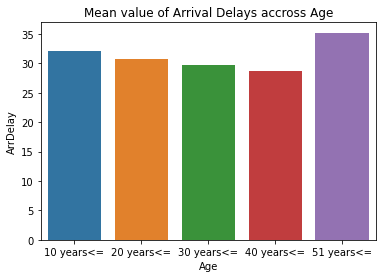

In [22]:
fig, ax = plt.subplots()
rects1 = ax.bar(a_1['Age'],a_1['ArrDelay'])
ax.set(ylabel = "Mean delay ")
ax.set_xlabel('Age')
ax.set_title('Mean value of Arrival Delays accross Age')
sns.barplot(x = 'Age', y = 'ArrDelay', data =a_1 )
# Show the plot
plt.show()

Finding the median values

In [23]:
a_2= merged_.groupby(['Age'])['ArrDelay'].median().reset_index()
a_2

,Age,ArrDelay
0,10 years<=,16.0
1,20 years<=,15.0
2,30 years<=,15.0
3,40 years<=,14.0
4,51 years<=,16.0


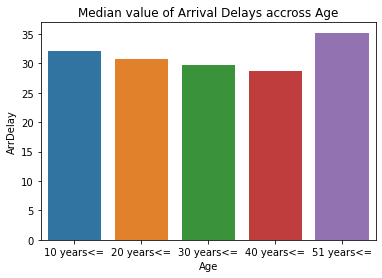

In [24]:
fig, ax = plt.subplots()
rects1 = ax.bar(a_2['Age'],a_2['ArrDelay'])
ax.set(ylabel = "Median delay ")
ax.set_xlabel('Age')
ax.set_title('Median value of Arrival Delays accross Age')
sns.barplot(x = 'Age', y = 'ArrDelay', data =a_1 )
# Show the plot
plt.show()

Calculating the correlation coefficient

In [45]:
corr = merged_[["ArrDelay", "YearofMAnu"]]
corr_1 = corr.corr('pearson')
corr_1

,ArrDelay,YearofMAnu
ArrDelay,1.000000,0.003396
YearofMAnu,0.003396,1.000000
